<a href="https://colab.research.google.com/github/mariobgsp/thermal-face-recognition/blob/main/thermal_FER_1try.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
path = "../content/drive/MyDrive/thermal_datasets"
os.listdir(path)

['test', 'train']

In [3]:
# Join train and test with path
# train
train_path = os.path.join(path, "train")
print(os.listdir(train_path))
print("-"*100)

# test
test_path = os.path.join(path, "test")
print(os.listdir(test_path))

['emotion__neutral', 'emotion__shock', 'emotion__sunglasses', 'emotion__smile', 'emotion__sleepy']
----------------------------------------------------------------------------------------------------
['emotion__neutral', 'emotion__shock', 'emotion__sleepy', 'emotion__smile', 'emotion__sunglass']


In [4]:
from glob import glob
folders = glob ("../content/drive/MyDrive/thermal_datasets/train/*")
folders

['../content/drive/MyDrive/thermal_datasets/train/emotion__neutral',
 '../content/drive/MyDrive/thermal_datasets/train/emotion__shock',
 '../content/drive/MyDrive/thermal_datasets/train/emotion__sunglasses',
 '../content/drive/MyDrive/thermal_datasets/train/emotion__smile',
 '../content/drive/MyDrive/thermal_datasets/train/emotion__sleepy']

Text(0.5, 1.0, 'Neutral Emotion')

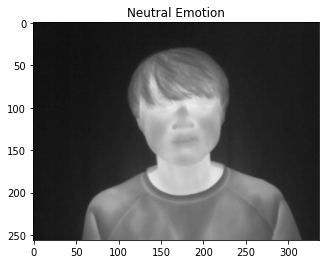

In [5]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread("../content/drive/MyDrive/thermal_datasets/train/emotion__neutral/neutral20.jpg"))
plt.title("Neutral Emotion")

Text(0.5, 1.0, 'Shock Emotion')

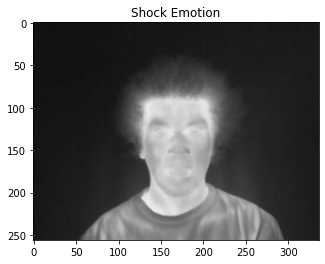

In [7]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread("../content/drive/MyDrive/thermal_datasets/train/emotion__shock/shock22.jpg"))
plt.title("Shock Emotion")

Text(0.5, 1.0, 'Using Sun Glasses')

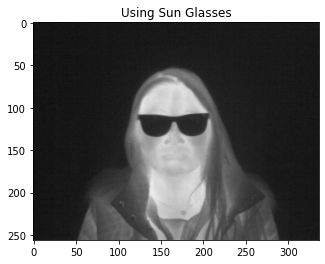

In [10]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread("../content/drive/MyDrive/thermal_datasets/train/emotion__sunglasses/sunglass46.jpg"))
plt.title("Using Sun Glasses")

In [11]:
# Import Necessary Packages
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential

In [12]:
# Image SIZE
SIZE = [224, 224]

In [13]:
# USING VGG19
from tensorflow.keras.applications.vgg19 import VGG19

In [14]:
# VGG19 with INPUT SHAPE and WEIGHT is ImageNET
vg19 = VGG19(input_shape=SIZE + [3], weights="imagenet", include_top=False)

80142336/80134624 [==============================] - 0s 0us/step


In [15]:
for layer in vg19.layers:
    layer.trainable = False

In [16]:
x = Flatten()(vg19.output)

In [17]:
prediction = Dense(len(folders), activation="softmax")(x)

modelvg = Model(inputs=vg19.input, outputs=prediction)

In [18]:
# VGG19 model summary
modelvg.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [19]:
# Compile Model
modelvg.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [20]:
# Data Augmentation
train_datagen_vg19 = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

test_datagen_vg19 = ImageDataGenerator(rescale=1./255)

In [23]:
trainning_set_vg19 = train_datagen_vg19.flow_from_directory(train_path,
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 class_mode="categorical")
testing_set_vg19 = test_datagen_vg19.flow_from_directory(test_path,
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 class_mode="categorical")

Found 305 images belonging to 5 classes.
Found 145 images belonging to 5 classes.


In [24]:
r_vg19 = modelvg.fit_generator(trainning_set_vg19,
                       validation_data=testing_set_vg19,
                       epochs=30,
                       steps_per_epoch=len(trainning_set_vg19),
                       validation_steps=len(testing_set_vg19)
                       )

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
10/10 [==============================] - 209s 21s/step - loss: 2.6514 - accuracy: 0.2242 - val_loss: 2.0431 - val_accuracy: 0.2000
Epoch 2/30
10/10 [==============================] - 5s 478ms/step - loss: 1.8470 - accuracy: 0.3114 - val_loss: 1.4650 - val_accuracy: 0.3724
Epoch 3/30
10/10 [==============================] - 5s 478ms/step - loss: 1.4162 - accuracy: 0.3637 - val_loss: 1.2197 - val_accuracy: 0.4276
Epoch 4/30
10/10 [==============================] - 5s 483ms/step - loss: 1.2807 - accuracy: 0.4411 - val_loss: 1.3014 - val_accuracy: 0.4000
Epoch 5/30
10/10 [==============================] - 5s 484ms/step - loss: 1.3116 - accuracy: 0.4103 - val_loss: 1.3408 - val_accuracy: 0.4207
Epoch 6/30
10/10 [==============================] - 5s 481ms/step - loss: 1.3349 - accuracy: 0.4546 - val_loss: 1.5283 - val_accuracy: 0.3931
Epoch 7/30
10/10 [==============================] - 5s 480ms/step - loss: 1.4044 - accuracy: 0.4347 - val_loss: 1.3468 - val_accuracy: 0.4000
Epoch 

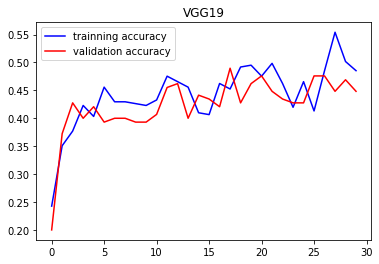

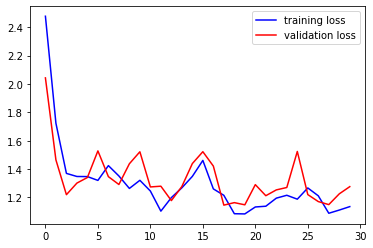

In [26]:
import matplotlib.pyplot as plt
accuracy = r_vg19.history['accuracy']
val_accuracy = r_vg19.history['val_accuracy']
loss = r_vg19.history['loss']
val_loss = r_vg19.history['val_loss']
epochs = range(len(accuracy))
plt.title("VGG19")
plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="training loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [27]:
y_pred = modelvg.predict(testing_set_vg19)

In [28]:
y_pred;

array([[5.24884798e-02, 5.29657155e-02, 7.99142480e-01, 8.98445100e-02,
        5.55884885e-03],
       [7.41903260e-02, 4.80471969e-01, 3.22352588e-01, 1.20786726e-01,
        2.19842372e-03],
       [1.57045230e-01, 3.64358515e-01, 4.39946800e-01, 3.84569876e-02,
        1.92479230e-04],
       [1.15788162e-01, 2.68978536e-01, 5.70766926e-01, 4.34394330e-02,
        1.02694938e-03],
       [1.69072971e-01, 1.15000062e-01, 6.58626080e-01, 5.48305959e-02,
        2.47036456e-03],
       [4.03450131e-02, 1.88200608e-01, 5.72849393e-01, 1.87587693e-01,
        1.10172629e-02],
       [1.14471123e-01, 1.98001564e-01, 5.55490732e-01, 1.29193500e-01,
        2.84307892e-03],
       [6.35895506e-02, 4.40166384e-01, 4.03660417e-01, 9.16497558e-02,
        9.33876494e-04],
       [1.04869373e-01, 2.16888234e-01, 4.09332603e-01, 2.65066147e-01,
        3.84369586e-03],
       [9.60457548e-02, 5.90033233e-02, 7.00944781e-01, 1.42560199e-01,
        1.44590600e-03],
       [9.12480429e-02, 2.1589

In [29]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 4, 2, 4, 1, 4, 2, 4, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 1, 4, 4, 2, 2, 1, 2, 4, 1, 4, 2, 1, 2, 4, 2,
       1, 4, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 4, 2, 1, 4, 1, 1, 2, 2, 2, 2,
       1, 2, 2, 4, 2, 1, 1, 4, 2, 4, 1, 4, 1, 4, 2, 1, 2, 2, 4, 2, 2, 2,
       2, 1, 2, 4, 2, 2, 4, 2, 2, 2, 1, 1, 1, 2, 4, 2, 4, 2, 4, 2, 4, 1,
       2, 1, 2, 1, 4, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 4, 2, 2, 2, 2, 1,
       1, 2, 4, 1, 2, 1, 2, 4, 1, 4, 1, 2, 2])

In [33]:
# Thermal Spot
test_img = plt.imread("../content/drive/MyDrive/thermal_datasets/test/emotion__shock/shock103.jpg")

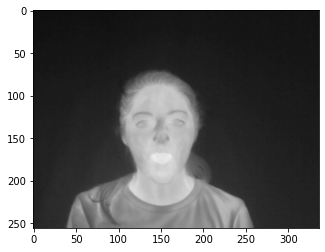

In [34]:
# Visualize
plt.imshow(test_img)

In [35]:
modelvg.save("vgg_19fer.model")

INFO:tensorflow:Assets written to: vgg_19fer.model/assets


In [36]:
# Load a Image and Detection
import cv2
import tensorflow as tf
def prepare(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array / 255
    new_array = cv2.resize(img_array, (224, 224))
    return new_array.reshape(-1, 224, 224, 3)

model = tf.keras.models.load_model("vgg_19fer.model")

In [37]:
# Prediction
prediction = model.predict([prepare("../content/drive/MyDrive/thermal_datasets/test/emotion__shock/shock103.jpg")])
np.argmax(prediction)

2

In [38]:
# Class Dictionary
class_dict = trainning_set_vg19.class_indices
class_dict

{'emotion__neutral': 0,
 'emotion__shock': 1,
 'emotion__sleepy': 2,
 'emotion__smile': 3,
 'emotion__sunglasses': 4}